<a href="https://colab.research.google.com/github/anish170805/Python-prac/blob/main/EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Uploading the data**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/diminos_data.csv')

**Top 5 rows of data**

In [4]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


### **Data Cleaning**

In [5]:
df.isnull().sum()

,0
order_id,0
order_placed_at,0
order_delivered_at,0


There are No null values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


The datatype of the columns `order_placed_at` and `order_delivered_at` are of object datatype , but are of datetime format as per observation

In [9]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


Now , we have columns with correct data types and the dataset is clean.

**Calculate Delivery Time**

Calculate the delivery time for each order by subtracting `order_placed_at` from `order_delivered_at`. This will give us the duration of each delivery.


In [12]:
df['delivery_time_seconds'] = (df['order_delivered_at'] - df['order_placed_at']).dt.total_seconds()
print(df[['order_placed_at', 'order_delivered_at', 'delivery_time_seconds']].head())

      order_placed_at         order_delivered_at  delivery_time_seconds
0 2023-03-01 00:00:59 2023-03-01 00:18:07.443132            1028.443132
1 2023-03-01 00:03:59 2023-03-01 00:19:34.925241             935.925241
2 2023-03-01 00:07:22 2023-03-01 00:22:28.291385             906.291385
3 2023-03-01 00:07:47 2023-03-01 00:46:19.019399            2312.019399
4 2023-03-01 00:09:03 2023-03-01 00:25:13.619056             970.619056


**Analyze Delivery Time Distribution**

A histogram or to visualize the distribution of delivery times.


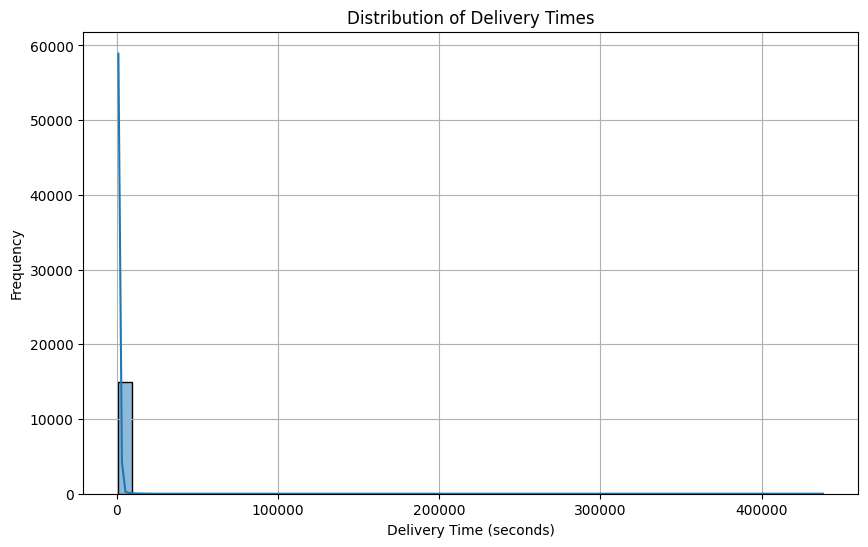

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['delivery_time_seconds'], bins=50, kde=True)
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Time (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Orders Over Time**

The number of orders placed over time to identify peak order periods.


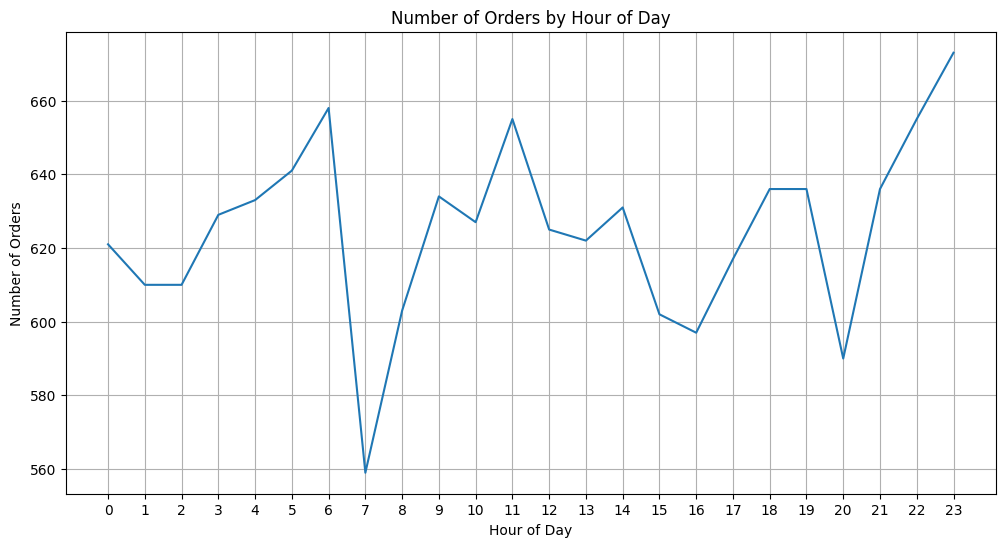

In [14]:
df['order_hour'] = df['order_placed_at'].dt.hour
orders_by_hour = df['order_hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=orders_by_hour.index, y=orders_by_hour.values)
plt.title('Number of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 24)) # Ensure all hours are shown
plt.grid(True)
plt.show()

**Peak Order Periods (Hourly)**: The line plot of orders by hour reveals that order placement is relatively consistent throughout the day, but there are slight peaks during late evening hours (around 22:00-23:00) and early morning (around 0:00-6:00). There's a noticeable dip in orders during mid-morning (around 7:00-8:00).

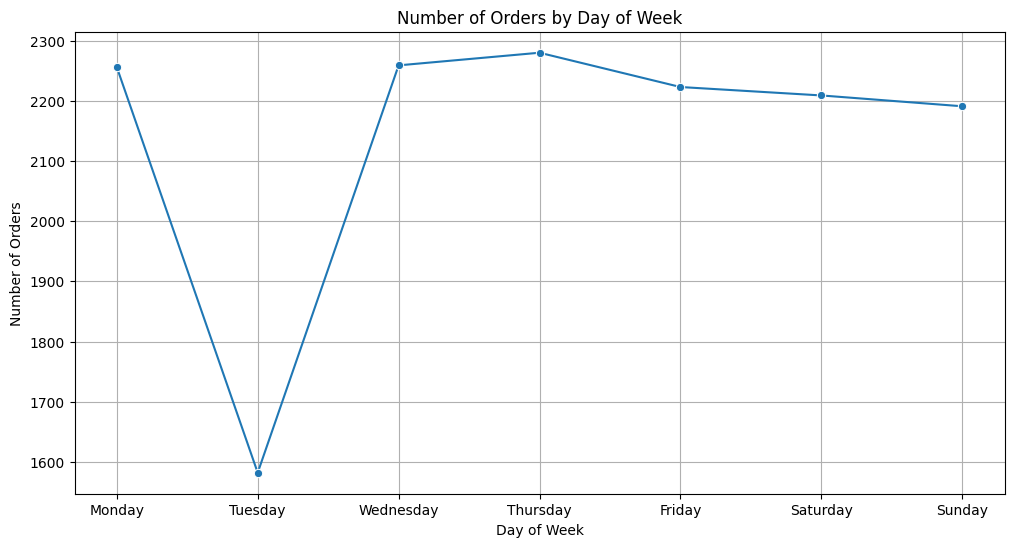

In [15]:
df['order_day_of_week'] = df['order_placed_at'].dt.day_name()
orders_by_day = df['order_day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12, 6))
sns.lineplot(x=orders_by_day.index, y=orders_by_day.values, marker='o')
plt.title('Number of Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

**Peak Order Periods (Daily)**: The daily order analysis indicates that order volumes are fairly stable across all days of the week, with Mondays and Wednesdays showing slightly higher order counts. Weekends (Saturday and Sunday) have slightly lower order volumes compared to weekdays.

**Longest Delivery Times**

Identifing to list the orders with the longest delivery times.


In [16]:
longest_deliveries = df.sort_values(by='delivery_time_seconds', ascending=False).head(10)
print('Top 10 orders with the longest delivery times:')
print(longest_deliveries[['order_id', 'order_placed_at', 'order_delivered_at', 'delivery_time_seconds']])

Top 10 orders with the longest delivery times:
       order_id     order_placed_at         order_delivered_at  \
5499    1528610 2023-03-10 17:06:22 2023-03-15 18:46:11.882496   
4165    1527276 2023-03-08 09:46:43 2023-03-12 11:34:09.085175   
10225   1533336 2023-03-19 11:07:32 2023-03-22 13:53:25.472592   
14155   1537266 2023-03-26 09:54:24 2023-03-29 02:42:50.645252   
10007   1533118 2023-03-19 00:56:34 2023-03-21 00:59:41.454974   
11944   1535055 2023-03-22 12:50:53 2023-03-23 08:03:40.654492   
1361    1524472 2023-03-03 10:04:13 2023-03-04 03:51:02.368715   
5109    1528220 2023-03-10 01:04:58 2023-03-10 14:13:37.181329   
117     1523228 2023-03-01 04:59:04 2023-03-01 18:06:52.046891   
1910    1525021 2023-03-04 10:41:17 2023-03-04 23:20:15.509579   

       delivery_time_seconds  
5499           437989.882496  
4165           352046.085175  
10225          269153.472592  
14155          233306.645252  
10007          172987.454974  
11944           69167.654492  
1361     

**Longest Delivery Times**: Identifying the top 10 longest delivery times highlights severe outliers, with some orders taking several days to be delivered. These extreme durations warrant further investigation to understand potential bottlenecks, logistical issues, or data anomalies.